before quantifying the relationship between the indivisual features and the target variable; have to determine whether than feature has a significaant role in explaining the target

In [ ]:
1. maybe morgage, debt, rent, lease

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sqlalchemy import create_engine
import warnings


postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'weatherinszeged'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from weatherinszeged',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [11]:
df.columns

Index(['date', 'summary', 'preciptype', 'temperature', 'apparenttemperature',
       'humidity', 'windspeed', 'windbearing', 'visibility', 'loudcover',
       'pressure', 'dailysummary'],
      dtype='object')

In [12]:
df['target_variable'] = df['apparenttemperature'] - df['temperature']

In [13]:
df.columns

Index(['date', 'summary', 'preciptype', 'temperature', 'apparenttemperature',
       'humidity', 'windspeed', 'windbearing', 'visibility', 'loudcover',
       'pressure', 'dailysummary', 'target_variable'],
      dtype='object')

In [15]:
# Y is the target variable
Y = df['target_variable']
# X is the feature set which includes
# is_male and is_smoker variables
X = df[['humidity','windspeed']]

# We create a LinearRegression model object
# from scikit-learn's linear_model module.
lrm = linear_model.LinearRegression()

# fit method estimates the coefficients using OLS
lrm.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [-3.02918594 -0.11929075]

Intercept: 
 2.4381054151876933


In [16]:
import statsmodels.api as sm

# We need to manually add a constant
# in statsmodels' sm
X1 = sm.add_constant(X)

results = sm.OLS(Y, X1).fit()

results.summary()

//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        target_variable   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                 1.949e+04
Date:                Fri, 01 Nov 2019   Prob (F-statistic):               0.00
Time:                        14:55:59   Log-Likelihood:            -1.7046e+05
No. Observations:               96453   AIC:                         3.409e+05
Df Residuals:                   96450   BIC:                         3.409e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4381      0.021    115.948      0.000       2.397       2.479
humidity      -3.0292      0.024   -126.479      0.000      -3.076      -2.982
windspeed     -0.1193      0.001   -176.164      0.000      -0.121      -0.118
==============================================================================
Omnibus:                     3935.747   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4613.311
Skew:                          -0.478   Prob(JB):                         0.00
Kurtosis:                       3.484   Cond. No.                         88.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


Coefficients: 
 [2. 3.]

Intercept: 
 0.999999999650754


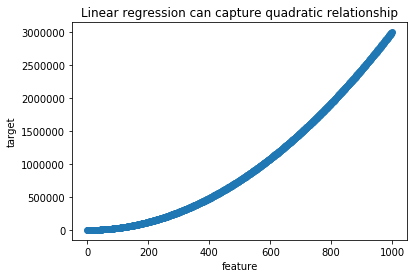

In [7]:
# ASSUMPTION 1: Linearity of the model in its coefficients
df = pd.DataFrame()

# data from 0 to 999
df["X"] = np.arange(0,1000,1)
# we take the square of X
df["X_sq"] = df["X"]**2

# this is our equation: Y = 1 + 2*X + 3*X^2
df["Y"] = 1 + 2*df["X"] + 3*df["X_sq"]

# we fit a linear regression where target is Y
# and features are X and X^2
lrm_example = linear_model.LinearRegression()
lrm_example.fit(df[["X","X_sq"]],df["Y"])

# predictions of the linear regression
predictions = lrm_example.predict(df[["X","X_sq"]])

# we print the estimated coefficients
print('\nCoefficients: \n', lrm_example.coef_)
print('\nIntercept: \n', lrm_example.intercept_)

# we plot the estimated Y and X
# the relationship should be quadratic
plt.scatter(df["X"], predictions)
plt.xlabel("feature")
plt.ylabel("target")
plt.title('Linear regression can capture quadratic relationship')
plt.show()

In [9]:
import statsmodels.api as sm

# We need to manually add a constant
# in statsmodels' sm
X1 = sm.add_constant(X)

results = sm.OLS(Y, X1).fit()

results.summary()

//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            temperature   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                 3.470e+04
Date:                Thu, 31 Oct 2019   Prob (F-statistic):               0.00
Time:                        12:36:26   Log-Likelihood:            -3.2838e+05
No. Observations:               96453   AIC:                         6.568e+05
Df Residuals:                   96450   BIC:                         6.568e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.8674      0.108    350.251      0.000      37.656      38.079
humidity     -32.4374      0.123   -263.415      0.000     -32.679     -32.196
windspeed     -0.1939      0.003    -55.701      0.000      -0.201      -0.187
==============================================================================
Omnibus:                     3415.546   Durbin-Watson:                   0.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3844.707
Skew:                          -0.458   Prob(JB):                         0.00
Kurtosis:                       3.344   Cond. No.                         88.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
# Y is the target variable
Y = df['target_variable']

# This is the interaction between bmi and smoking
df["humidity_windspeed"] = df.humidity * df.windspeed

# X is the feature set
#X2 = df[['date', 'summary', 'preciptype', 'temperature', 'apparenttemperature',
       #'humidity', 'windspeed', 'windbearing', 'visibility', 'loudcover',
       #'pressure', 'dailysummary', 'target_variable',"humidity_windspeed"]]
X2 = df['humidity_windspeed']
# We add a constant to the model as it's a best practice
# to do so every time!
X3 = sm.add_constant(X2)

# We fit an OLS model using statsmodels
results = sm.OLS(Y, X3.astype(float)).fit()

# We print the summary results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        target_variable   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                 4.426e+04
Date:                Fri, 01 Nov 2019   Prob (F-statistic):               0.00
Time:                        15:33:36   Log-Likelihood:            -1.6861e+05
No. Observations:               96453   AIC:                         3.372e+05
Df Residuals:                   96451   BIC:                         3.372e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3511      0